In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
!ls -l inputs/

total 3444
-rw-rw-r-- 1 ecbm4040 ecbm4040 195196 Dec 11 02:42 composition7.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040 284759 Dec 11 01:21 csjl.jpeg
-rw-rw-r-- 1 ecbm4040 ecbm4040 160407 Dec 11 01:21 guernica.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040 183755 Dec 11 01:21 hk.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040 204053 Dec 11 01:21 nyc_night.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040  21771 Dec 11 01:21 output_csjl_starry_night.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040  19838 Dec 11 01:21 output_hk_guernica.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040 173093 Dec 11 01:21 output.jpeg
-rw-rw-r-- 1 ecbm4040 ecbm4040  11328 Dec 11 01:21 output_tubingen_scream.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040  15871 Dec 11 01:21 output_tubingen_seated_nude.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040  16821 Dec 11 01:21 output_tubingen_shipwreck.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040  24776 Dec 11 01:21 output_tubingen_somposition.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040  21918 Dec 11 01:21 output_tubingen_starry_night.jpg
-rw-rw-r-- 1 ecbm4040 ecbm4040 187647 Dec 11 01

## Define configuration

## Generate Image

tubingen.jpg was resized from (960, 720) to (300, 225)
scream.jpg was resized from (640, 795) to (300, 225)
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 1983392640.000000
  Number of iterations: 40
  Number of functions evaluations: 46
tubingen_scream_w300_i40_lr2.0_a1_b1000_nr0.1_lbfgs_avg_ps2_sw0.2_sn5_cn4_rt0.4.jpg


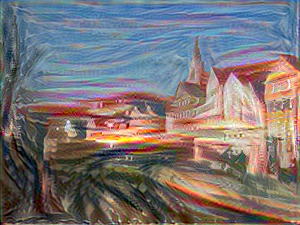

In [11]:
import stylize

content = 'tubingen.jpg'
style = 'scream.jpg'

stylize.apply(content, style, learning_rate=2.0,iters=40, 
              alpha=1, beta=1000, noise_ratio=0.1, new_width=300, pool_method='avg',
              pool_stride=2, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
              style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

tubingen.jpg was resized from (960, 720) to (300, 225)
composition7.jpg was resized from (1000, 657) to (300, 225)
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 371260896.000000
  Number of iterations: 300
  Number of functions evaluations: 324
tubingen_composition7_w300_i300_lr1.0_a1_b1000_nr0.6_lbfgs_avg_ps2_sw0.2_sn5_cn4_rt0.4.jpg


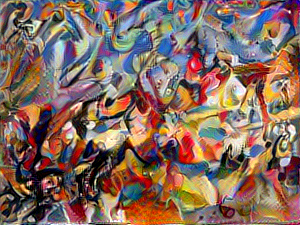

In [13]:
import stylize

content = 'tubingen.jpg'
style = 'composition7.jpg'

stylize.apply(content, style, learning_rate=1.0, iters=300, 
              alpha=1, beta=1000, noise_ratio=0.6, new_width=300, pool_method='avg',
              pool_stride=2, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
              style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

tubingen.jpg was resized from (960, 720) to (300, 225)
starry_night.jpg was resized from (360, 285) to (300, 225)
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 52894932.000000
  Number of iterations: 50
  Number of functions evaluations: 57
tubingen_starry_night_w300_i50_lr1.0_a1_b100_nr0.1_lbfgs_avg_ps2_sw0.2_sn5_cn4_tm_rt1.440924277305603.jpg


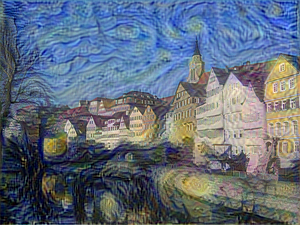

In [43]:
content = 'tubingen.jpg'
style = 'starry_night.jpg'

stylize.apply(content, style, learning_rate=1.0,iters=50, 
              alpha=1, beta=100, noise_ratio=0.1, new_width=300, pool_method='avg',
              pool_stride=2, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
              style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

tubingen.jpg was resized from (960, 720) to (300, 225)
shipwreck.jpg was resized from (700, 483) to (300, 225)
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 1648536.250000
  Number of iterations: 100
  Number of functions evaluations: 107
tubingen_shipwreck_w300_i100_lr1.0_a1_b5_nr0.1_lbfgs_avg_ps2_sw0.2_sn5_cn4_tm_rt0.5468803143501282.jpg


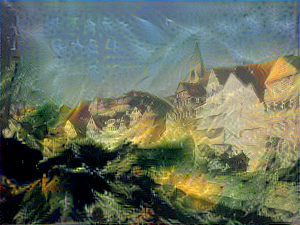

In [20]:
content = 'tubingen.jpg'
style = 'shipwreck.jpg'

stylize.apply(content, style, learning_rate=1.0,iters=100, 
              alpha=1, beta=5, noise_ratio=0.1, new_width=300, pool_method='avg',
              pool_stride=2, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
              style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

tubingen.jpg was resized from (960, 720) to (300, 225)
seated_nude.jpg was resized from (576, 750) to (300, 225)
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 76435000.000000
  Number of iterations: 50
  Number of functions evaluations: 55
tubingen_seated_nude_w300_i50_lr1.0_a1_b100_nr0.6_lbfgs_avg_ps2_sw0.2_sn5_cn4_tm_rt1.4643444061279296.jpg


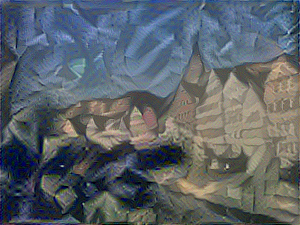

In [44]:
content = 'tubingen.jpg'
style = 'seated_nude.jpg'

stylize.apply(content, style, learning_rate=1.0,iters=50, 
              alpha=1, beta=100, noise_ratio=0.6, new_width=300, pool_method='avg',
              pool_stride=2, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
              style_num_layers=5, content_layer_num=4, optimizer='lbfgs')

csjl.jpeg was resized from (1600, 1200) to (300, 225)
starry_night.jpg was resized from (360, 285) to (300, 225)
INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'
  Objective function value: 5076136.000000
  Number of iterations: 70
  Number of functions evaluations: 79
csjl_starry_night_w300_i70_lr1.0_a1_b10_nr0.6_lbfgs_avg_ps2_sw0.2_sn5_cn4_tm_rt1.38361884866442.jpg


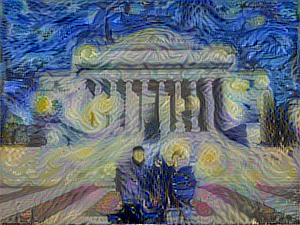

In [42]:
content = 'csjl.jpeg'
style = 'starry_night.jpg'

stylize.apply(content, style, learning_rate=1.0,iters=70, 
              alpha=1, beta=10, noise_ratio=0.6, new_width=300, pool_method='avg',
              pool_stride=2, style_loss_layers_w=(0.2, 0.2, 0.2, 0.2, 0.2), 
              style_num_layers=5, content_layer_num=4, optimizer='lbfgs')